# Pymaceuticals Inc.
---

### Analysis

- This study experimented with 10 variables across 248 mice. The mice were divided almost equally between male and female mice.
- After isolating mouse ID l509 and plotting the tumor size of the trial period, it is clear the Capomuliun treatment reduced the tumor over a 30 day period.
- It is clear as the weight of the mouse increased so did the size of the tumor.
 

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv" 
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [37]:
# Checking the number of mice.
mice_count = mouse_study["Mouse ID"].nunique()
mice_count

249

In [107]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_duplicates = mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates_2

array(['g989'], dtype=object)

In [108]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicates_3 = mouse_study.loc[mouse_study["Mouse ID"] == mouse_duplicates_2[0]]
mouse_duplicates_3

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [111]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_DF = mouse_study[mouse_study["Mouse ID"].isin(mouse_duplicates_2)==False]
clean_DF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [115]:
# Checking the number of mice in the clean DataFrame.
duplicate_mice_count = (clean_DF["Mouse ID"].nunique())
duplicate_mice_count

248

## Summary Statistics

In [126]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Tumor_Volume_Per = mouse_study.groupby("Drug Regimen")
mean = Tumor_Volume_Per["Tumor Volume (mm3)"].mean()
median = Tumor_Volume_Per["Tumor Volume (mm3)"].median()
variance = Tumor_Volume_Per["Tumor Volume (mm3)"].var()
standard_deviation = Tumor_Volume_Per["Tumor Volume (mm3)"].std()
sem = Tumor_Volume_Per["Tumor Volume (mm3)"].sem()
                                
Tumor_Summary = pd.DataFrame({"Mean": mean,
                              "Median": median,
                              "Variance": variance,
                              "Standard Deviation": standard_deviation,
                              "SEM":sem})
Tumor_Summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [134]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Agg_df = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
clean_DF.groupby("Drug Regimen").agg(Agg_df)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

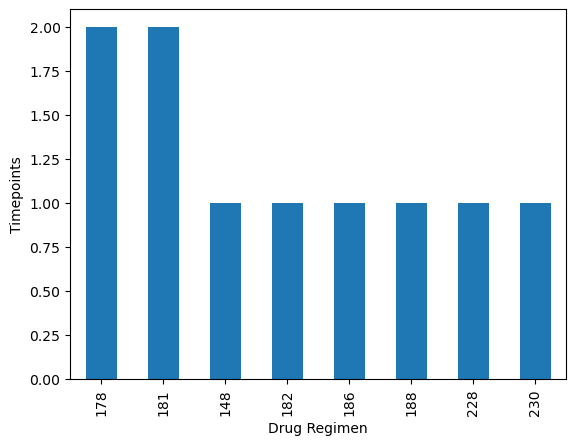

In [139]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints = clean_DF["Drug Regimen"].value_counts()
timepoints_df = pd.DataFrame(timepoints)
timepoints_df.columns = ["Total Timepoints"]
timepoints_plot = timepoints_df.value_counts("Total Timepoints", ascending=False).plot(kind="bar")
timepoints_plot.set_xlabel('Drug Regimen')
timepoints_plot.set_ylabel("Timepoints")
plt.show

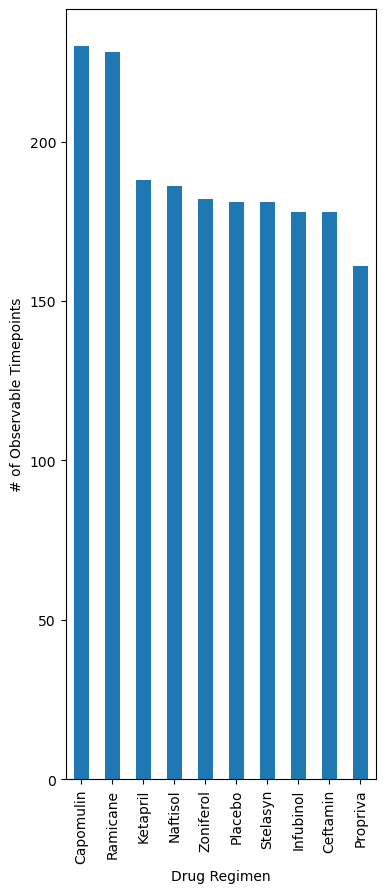

In [143]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints = mouse_study["Drug Regimen"].value_counts()
timepoints.plot(kind="bar", figsize=(4, 10))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observable Timepoints")
plt.show()

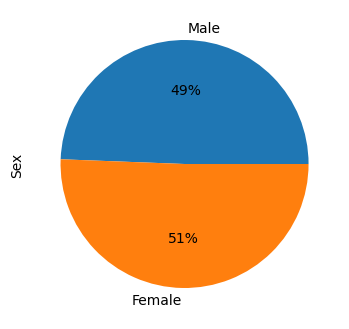

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dist = mouse_study.groupby("Sex")
gender_dist_len = gender_dist["Sex"].count()
gender_dist_plot = gender_dist_len.plot(labels = ["Male", "Female"], kind = "pie", y = "Sex", autopct = "%1.0f%%", figsize=(4, 10))

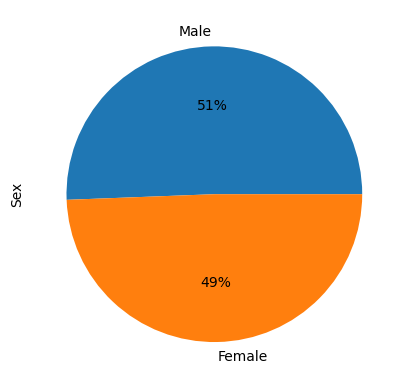

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_dist_pyplot = [gender_dist_len["Male"], gender_dist_len["Female"]]
gender_dist_labels = ["Male", "Female"]
plt.pie(gender_dist_pyplot, labels = ["Male", "Female"], autopct = "%1.0f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [196]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_DF.groupby("Mouse ID")
last_tp = last_tp["Timepoint"].max()
last_tp_df = pd.DataFrame(last_tp)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tv = pd.merge(last_tp_df, clean_DF, on = ["Mouse ID", "Timepoint"])
last_tv.head(30)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [241]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
UQ = []
LQ = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    quartiles = last_tv[last_tv["Drug Regimen"] == drug]["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    LQ_2 = quartiles[.25]
    UQ_2 = quartiles[.75]
    IQR = UQ_2 - LQ_2
    
    UQ.append(UQ_2)
    LQ.append(LQ_2)
    print(f"The IQR for {drug} is {IQR}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = LQ_2 - (1.5*IQR)
    upper_bound = UQ_2 + (1.5*IQR)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The IQR for Capomulin is 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The IQR for Ramicane is 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The IQR for Infubinol is 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The IQR for Ceftamin is 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


Text(0.5, 0, '')

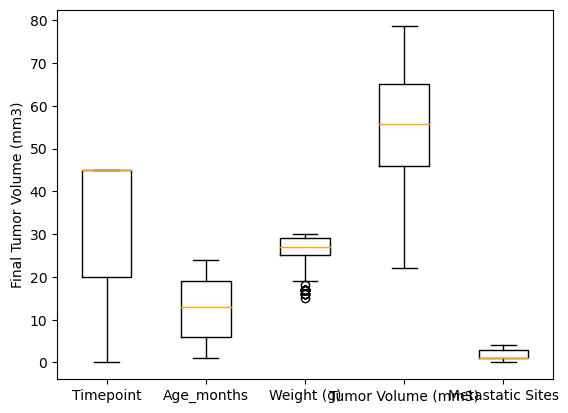

In [269]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# set the x and y axis labels
# show the plot
        

boxplot = last_tv.boxplot(grid = False, color = dict(boxes = "black", whiskers = "black", medians = "orange"))
boxplot.set_ylabel("Final Tumor Volume (mm3)")
boxplot.set_xlabel("")

## Line and Scatter Plots

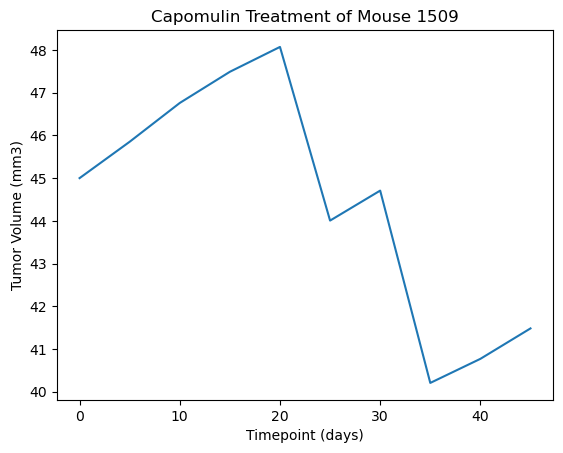

In [291]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_plot = clean_DF.loc[clean_DF["Mouse ID"] == "l509"]
plt.plot(capomulin_plot["Timepoint"], capomulin_plot["Tumor Volume (mm3)"])

plt.title("Capomulin Treatment of Mouse 1509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

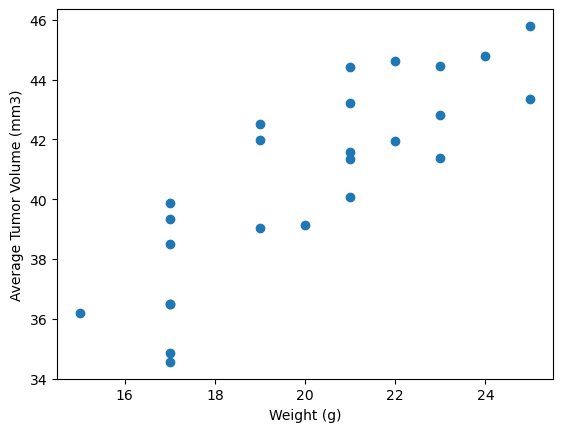

In [281]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse = clean_DF.loc[clean_DF["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")

average = mouse["Tumor Volume (mm3)"].mean()
weight = mouse["Weight (g)"].unique()
plt.scatter(weight, average)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlatioin between mouse weight and the average tumor volume is 0.84


NameError: name 'slope' is not defined

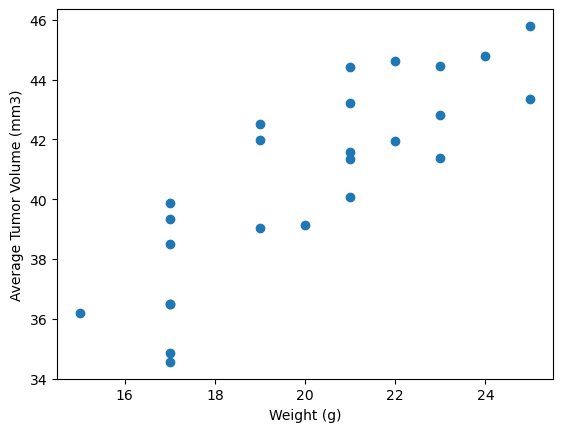

In [290]:
# Calculate the correlation coefficient and a linear regression model
corr = st.pearsonr(weight, average)
print("The correlatioin between mouse weight and the average tumor volume is 0.84")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.scatter(weight, average)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

regress_values = weight * slope + intercept
plt.plot(weight, regress_values, "r-")
line = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line,(19,38))
      
plt.show()
